In [1]:
#!/usr/bin/env python3
# coding: utf-8
import pandas as pd
import clover_graphs as graphs
import graphs_df_formatting as form

10


In [2]:
def show_svg(filename):
    from IPython.display import SVG, display
    display(SVG(filename=f'{filename}.svg'))

In [3]:
df = pd.read_csv('../data/test/sample_data_month_categories.csv', dtype={'amount':'float32'})

In [4]:
type(df.amount[0])

numpy.float32

In [5]:
df.head()

,date,transaction,amount,identifier,category
0,03/31/2021,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.989998,"TRELLO.COM,",work
1,04/05/2021,KROGER #456 MARTINSBURG NC,-229.119995,KROGER,food
2,04/05/2021,HOME DEPOT #11154 MARTINSBURG NC,-20.000000,DEPOT,home
3,04/05/2021,JAPANESE RESTAURANT MARTINSBURG NC,-48.389999,RESTAURANT,restaurants
4,04/06/2021,TRACTOR SUPPLY #5555 NEWARK NY,-27.500000,TRACTOR,home


# Possible DF layout

 |   |   |   |   |   | |||
|---|---|---|---|---|---|---|---|
 | **parent**       | **type**         | **priority**     | **fixed/variable** | **one-time/re-occuring** | **identifier**    | **amount**  | **date**    | **transaction**                   |
 | health       |life insurance| essential    | fixed          | re-occuring          | 'AAA Insurance| -50     | 01/22/21| AAA INSURANCE PAYMENT 48684   |
 | entertainment|movies        | non-essential| variable       | one-time             | 'REGAL'       | -15     | 01/12/21| CINEMA REGAL PARK WEST VA 1588|


# Budget
---

In [6]:
incomes = graphs.budget_table(10000)
income = incomes[0]
income_dict = incomes[1]

---------------------------------------
---------------------------------------
Total Yearly income:		100000
---------------------------------------
Monthly Ideal amounts
---------------------------------------
---------------------------------------
Category	Percent		Amount
---------------------------------------
Home		(25%)		2083
Lifestyle	(30%)		2500
Debt		( 5%)		416
Savings		(20%)		1666
Food		(10%)		833
Transpo		( 5%)		416
Util		( 5%)		416


In [7]:
income_dict

{'home': [30, 2500],
 'lifestyle': [15, 1250],
 'debt': [10, 833],
 'savings': [20, 833],
 'food': [10, 1250],
 'transportation': [10, 833],
 'utility': [5, 833]}

In [8]:
ideal_dict = pd.DataFrame.from_dict(income_dict)
ideal_frame = ideal_dict.T.reset_index().rename(columns={'index':'category', 0:'percent_ideal', 1:'allocated'})

In [9]:
seed_answers = [2500, 1500, 500, 500, 800, 200, 500]
actual = seed_answers

categories = list(ideal_frame['category'])
#actual = []
# for category in categories:
#         actual.append(int(get_spending(category))
ideal_frame['actual'] = actual
extra = pd.Series(['unspent', 0, 0, 0], index=ideal_frame.columns)
ideal_frame = ideal_frame.append(extra, ignore_index=True)
overage = pd.Series(['overage', 0, 0, 0], index=ideal_frame.columns)
ideal_frame = ideal_frame.append(overage, ignore_index=True)

total_spent = sum(ideal_frame.actual)
spending_difference = sum(ideal_frame.actual) - sum(ideal_frame.allocated)
print(f'You make ${int(income/12)} a month')
print(f'You spend ${total_spent} a month')
print(f'You spend ${spending_difference} over or under your budget')

if spending_difference < 1:
    ideal_frame['actual'][7] = spending_difference*-1
elif spending_difference > 1:
    ideal_frame['actual'][8] = spending_difference*-1

pie_group = ideal_frame.sort_values(['actual'], ascending=False)

You make $8333 a month
You spend $6500 a month
You spend $-1832 over or under your budget


/Users/Jen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
red = 'tomato'
coral = 'FF8360'
pastel_pink = 'DA9598'
rajah = 'FFAA5A'
light_red = 'ED6A5A'
soft_colors = [light_red, 'lightsalmon', rajah, 'gold',
            'lightgreen', 'mediumturquoise', 'lightblue', 'lightgray', 'white']

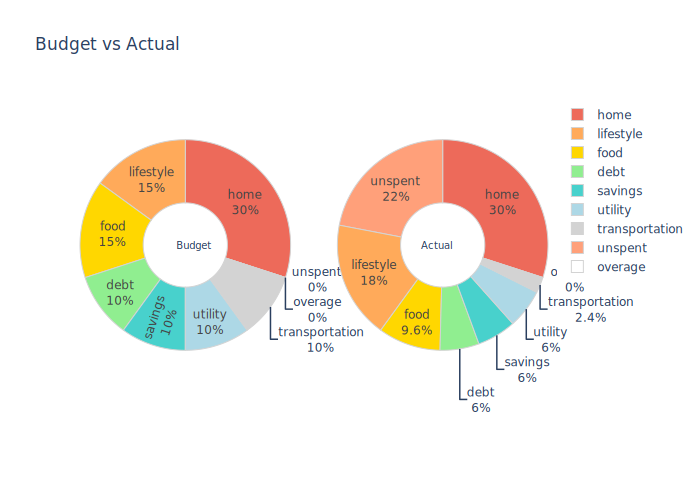

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = pie_group.category

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=pie_group.category,
    values=pie_group.allocated,
    name="Essential"),
              1, 1)
fig.add_trace(go.Pie(
    labels=pie_group.category, 
    values=list(pie_group.actual), 
    name="Non-Essential"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='label + percent', marker=dict(colors=soft_colors[:len(labels)], line=dict(color='lightgrey', width=1)))

fig.update_layout(
    title_text="Budget vs Actual",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Budget', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='Actual', x=0.80, y=0.5, font_size=10, showarrow=False)])
fig.write_image('donut_budget_V_actual.svg')
#fig.show()
show_svg('donut_budget_V_actual')

# Treemap
---

In [12]:
df_treemap = form.graph_data_formatting(df)[0]
month_sum = form.graph_data_formatting(df)[3]
month_categories = form.graph_data_formatting(df)[4]
months = month_categories['month'].unique()
percentage = []
final = []
for month in months:
    percentage.append(graphs.get_percentage(month, month_categories))
final = [a for b in percentage for a in b]
month_categories['values'] = final
months = month_categories['month'].unique()

date
skipping....
date
skipping....


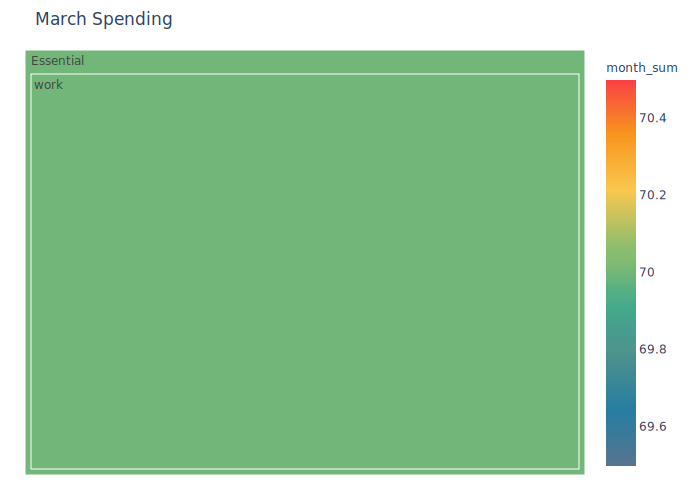

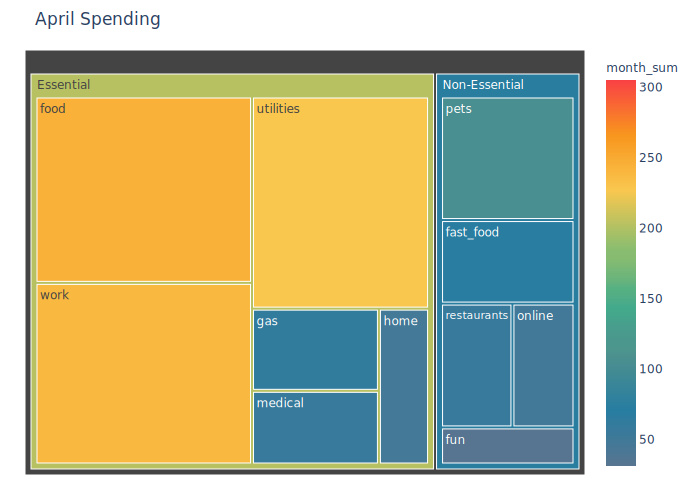

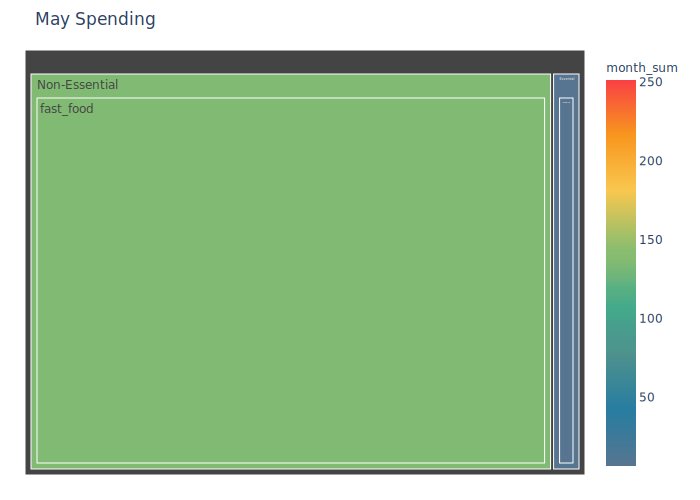

In [13]:
graphs.loop_plots(months, month_categories)
for i in months:
    show_svg(f'images/treemap{i}')

# Stacked Bar Graph
---

In [14]:
df_bar = form.graph_data_formatting(df)[0]
cat_order = form.graph_data_formatting(df)[1]
pos_amount = form.graph_data_formatting(df)[2]

date
skipping....
date
skipping....
date
skipping....


In [15]:
graphs.make_stacked_bar_graph(df_bar, cat_order, pos_amount)

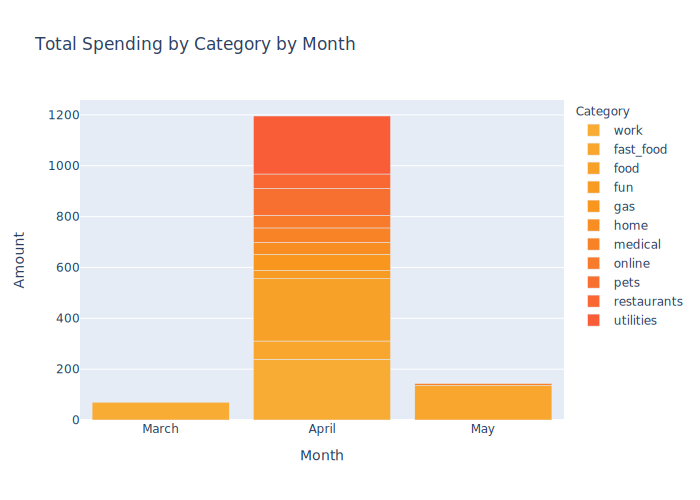

In [16]:
show_svg('images/fig_stacked_bar')

# Sunburst Graph
---

In [17]:
graphs.make_sunburst(df)

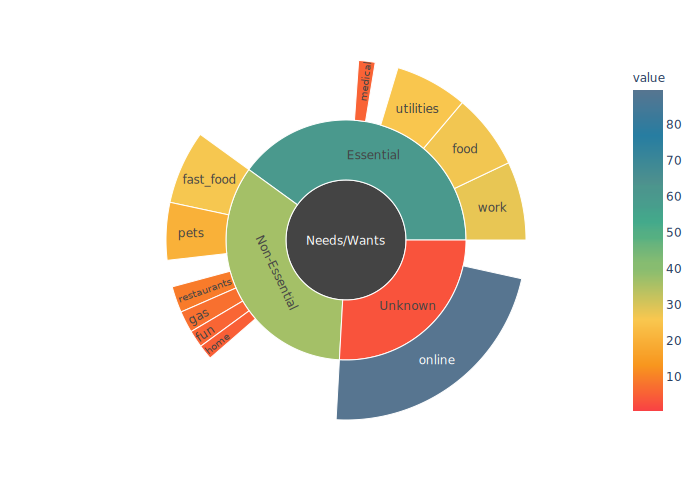

In [18]:
show_svg('images/sunburst')

# Tables
---

!Note - make.tables is doing something weird with the df

## Green
---

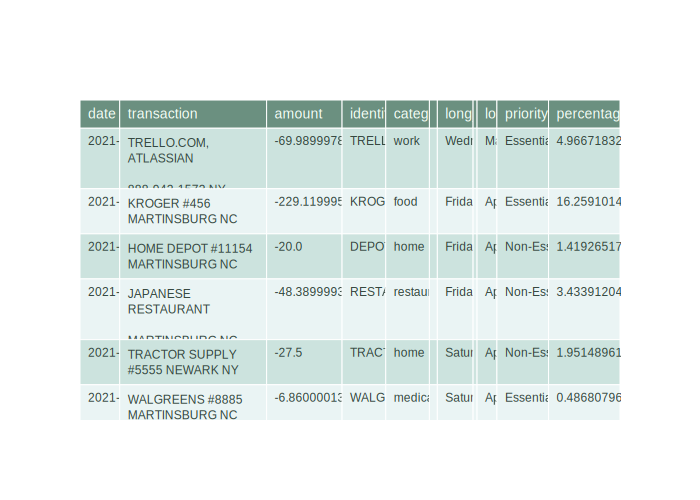

In [19]:
rowEvenColor = '#cce3de'
rowOddColor = '#EAF4F4'
green_colors = ['#6b9080', '#f6fff8', '#cce3de', '#34463E']
graphs.make_table(df, green_colors, rowEvenColor, rowOddColor, 'green')
show_svg('images/table_green')

## Blue
---

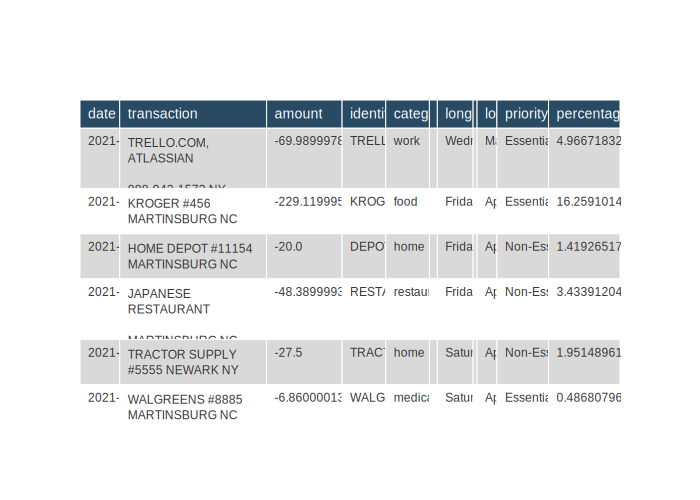

In [20]:
blue_colors = ['#284B63','#FFFFFF', '#D9D9D9', '#353535']
white = '#FFFFFF'
grey = '#D9D9D9'
graphs.make_table(df, blue_colors, grey, white, 'blue')
show_svg('images/table_blue')